In [1]:
import numpy as np
import pandas as pd

In [2]:
#bat = pd.read_csv("batting_stacked_hwh_fpos.csv")
bat = pd.read_csv("stacked_batting_features.csv")
bat_agg = pd.read_csv("batting_agg.csv")
X_bat = pd.merge(bat, bat_agg, how='inner', left_on='player_id', right_on='player_id')
X_bat.head()

,player_id,year-0,g-0,ab-0,r-0,h-0,double-0,triple-0,hr-0,rbi-0,...,sb_ratio,bb_per_pa,so_per_ab,slg,obp,rc,rc_per_ab,babip,iso,pa_per_so
0,ordazlu01,1997.0,12.0,22.0,3.0,6.0,1.0,0.0,0.0,1.0,...,0.705882,0.068687,0.121005,0.248858,0.275574,30.021186,0.063604,0.246154,0.029680,8.905660
1,distebe01,1984.0,45.0,78.0,10.0,13.0,1.0,2.0,3.0,9.0,...,0.500000,0.076023,0.173333,0.360000,0.294294,31.141104,0.095525,0.250000,0.133333,6.269231
2,schmimi01,1972.0,13.0,34.0,2.0,7.0,0.0,0.0,1.0,3.0,...,0.674242,0.146896,0.278300,0.514855,0.373946,505.792477,0.161234,0.288288,0.258744,4.239189
3,thomeji01,1991.0,27.0,98.0,7.0,25.0,4.0,2.0,1.0,9.0,...,0.583333,0.154306,0.257438,0.530055,0.403924,350.181400,0.178938,0.334208,0.241651,4.615566
4,diazma02,2003.0,4.0,9.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0.619048,0.036623,0.184818,0.447745,0.343943,136.528042,0.144474,0.353909,0.138614,5.625000


In [89]:
yvals = pd.read_csv("batting_yarr.csv")
# merge code to eliminate mismatches
y_bat = pd.merge(yvals, X_bat[["player_id"]], how="inner", left_on="player_id", right_on="player_id")
y_bat.head()

,player_id,0,1,2,3,4,5,6,7,8,9
0,ordazlu01,0.0,0.0,0.0,-0.1,0.0,0.0,0.0,0.0,0.0,0.0
1,distebe01,0.0,0.0,-0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,schmimi01,6.2,7.9,8.8,7.7,7.4,6.8,7.0,5.0,6.1,6.1
3,thomeji01,5.5,3.3,4.5,4.7,5.6,7.4,4.7,3.2,0.2,4.9
4,diazma02,1.7,0.6,-0.9,-0.8,-0.1,0.0,0.0,0.0,0.0,0.0


In [160]:
# cast 0 y values to -1

Y = y_bat.as_matrix()
Y = y_wars[:,1:]
yz_idx = Y == 0
Y[yz_idx] = -1
y = list(Y[:,0])

In [161]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X = X_bat.as_matrix()
X = X[:,1:] # remove player_id from x
#y = list(y_bat['0'])

Scaler = MinMaxScaler()
Scaler.fit(X)


/Users/johollen/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


MinMaxScaler(copy=True, feature_range=(0, 1))

In [162]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [163]:
X = Scaler.transform(X)
k = 200
Xr = SelectKBest(f_regression, k).fit_transform(X, y)
# should split data earlier but can't figure out how to save transform from selectkbest
Xtrain, Xtest, Ytrain, Ytest = train_test_split(Xr, y, test_size=0.20, random_state=54321)

In [164]:
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

MLP = MLPRegressor(activation='logistic', hidden_layer_sizes = (5), solver='lbfgs', alpha =1, random_state=54321)
param_grid = [0.00001, 0.00003, 0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3,
              1, 3, 10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000]
param_dict = {"alpha" : param_grid}
clf = GridSearchCV(MLP, param_dict, return_train_score=True, scoring='r2')
clf.fit(Xtrain, Ytrain)
clf.cv_results_
print(clf.best_params_)
clf.best_score_

{'alpha': 3}


0.53487982880140794

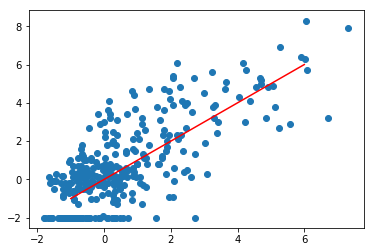

In [165]:
import matplotlib.pyplot as plt

Ypred = clf.predict(Xtest)
plt.scatter(Ypred, Ytest)
plt.plot([-1,6],[-1,6], 'r-')
plt.show()

In [166]:
from sklearn.metrics import r2_score

r2_score(Ytest, Ypred)

0.56183697387672638

In [108]:
from sklearn.feature_selection import RFE
#nn = MLPRegressor(activation='logistic', hidden_layer_sizes = (5), solver='lbfgs', alpha =3, random_state=54321)
from sklearn.linear_model import Ridge
#nnRFE = RFE(nn, n_features_to_select=100, step=1)
rr = Ridge(alpha=2)
feat = 1
rrRFE = RFE(rr, n_features_to_select=feat, step=1)
rrRFE.fit(X, y)
rrRFE.ranking_

array([273, 156,  29,   6, 172, 105,  89,  20, 242, 135,   9, 261,  19,
        57, 215,  28, 134,  65, 206,   7, 214,  96,  33, 188,  47,  21,
       232, 145, 243,  45,   8, 234,  48, 155, 154,  22,  30, 129,  46,
        67, 103, 260, 157, 102,  31, 226, 240,  38,   4,  44, 222, 221,
       125,  92, 158, 140, 271, 196, 247, 195,  32, 104,  91, 146, 143,
        82, 108, 269, 233,  40,  43, 264, 187,  81, 265, 173,  17, 279,
       174, 119, 270, 133, 276, 251,  54,  26, 179,  62,  39, 149,  42,
        55,  94, 128, 267,  87, 124,  10, 141, 239,  53, 127, 280,  13,
       132, 131, 208, 245, 168, 148, 282, 220, 122, 197, 180,  36, 207,
       229, 250, 126, 101,  37, 115, 237,  60, 123,  59, 152, 109, 202,
       142, 162, 170,  95,  52, 253, 274, 191, 263, 165, 151, 198, 201,
       190,  51,  74, 147, 112,  63, 117,  56,  64,  84, 130, 285, 171,
       100, 275, 257,  73, 203, 193, 111, 114, 272, 186,  25,  49, 185,
        24, 116,   3,  34, 238, 224,  58, 153,  68, 107, 252, 10

In [109]:
cols = X_bat.columns[1:]
colindex = np.argsort(rrRFE.ranking_)
cols[colindex]

Index(['war', 'war-5', 'hr-4', 'hr-1', 'r-5', 'r-0', 'pa-0', 'cs_per_ob-0',
       'cs-0', 'sh-2',
       ...
       'rc-1', 'tb-2', 'ob', 'rbi_per_ab-2', 'double', 'pa_per_so',
       'sb_ratio-3', 'batting_avg', 'obp-5', 'bb_per_pa'],
      dtype='object', length=288)

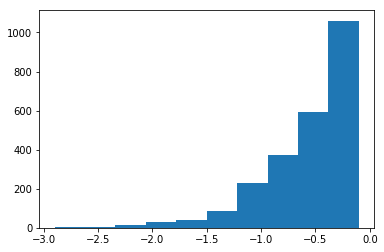

8655
2436


(1669, 10)

In [110]:
y_wars = y_bat.as_matrix()
y_wars = y_wars[:,1:]
y_negs = y_wars[y_wars < 0]
yn = list(y_negs)
plt.hist(yn)
plt.show()
print(len(y_wars[y_wars == 0]))
print(len(y_negs))
y_wars.shape